# Python Killer Project - analyzing and visualizing government (& iNaturalist) data related to Burmese Pythons sighting in Florida

## Questions Data Will Answer

- Are sightings of Burmese pythons in the wild increasing? (Client wants an analysis with visualizations)

- Which three counties are most affected? (Analysis + visualization)

- Are there geographic hotspots? If so, can you estimate the likelihood that volunteers would find pythons if we sent patrols to those areas between today's date and Dec 31st? (Analysis + viz)

- When are people most likely to spot pythons, and why? (Analysis + viz)

- Are sightings cyclical? (Analysis + viz)

- How many python observations do you predict will be recorded for the full 2019 year? (time-series analysis)

- For purposes of developing a social media/citizen science campaign, the client would like to know:

 - Should we be using iNaturalist to get the public more engaged? (Back your answer with data)

 - Which iNaturalist users are most active in sighting pythons?

 - Which iNaturalist users are most active in identifying pythons? Hint: iNaturalist observations must be confirmed by other users...

 - Which iNaturalist users are most connected in the python-spotting community (i.e. who are the influencers)?

 - Is there overlap between the observers in the two datasets (i.e., are any wildlife officials also using iNaturalist)? (Hint: yes. Visualize it.)

## First step: Data Cleaning

### Importing Modules

In [1]:
import pandas as pd
import numpy as np
import re

pd.set_option('display.max_columns', None)

### Loading Data

In [2]:
raw_data = pd.read_csv('pythons.csv')

In [3]:
raw_data.head()

objectid                                           Reporter  \
0   8303498                                Travis Mangione FWC   
1   8303147                             Edward F. Metzger III    
2   8298008  Michael Reupert NPS  Big Cypress National Pres...   
3   8295649  matthew mccollister National Park Service, Big...   
4   8295647  matthew mccollister National Park Service, Big...   

          ComName                         SciName OccStatus      ObsDate  \
0  Burmese python  Python molurus ssp. bivittatus  Positive  24 Nov 2019   
1  Burmese python  Python molurus ssp. bivittatus  Positive  20 Nov 2019   
2  Burmese python  Python molurus ssp. bivittatus  Positive  07 Nov 2019   
3  Burmese python  Python molurus ssp. bivittatus  Positive  06 Nov 2019   
4  Burmese python  Python molurus ssp. bivittatus  Positive  05 Nov 2019   

   DateAcc      DateEnt       DateUp                            Location  \
0      NaN  26 Nov 2019          NaN  Miami-Dade, Florida, United States   
1      NaN  22 Nov 2019  22 Nov 2019     Broward, Florida, United States   
2      NaN  12 Nov 2019          NaN     Collier, Florida, United States   
3      NaN  07 Nov 2019          NaN     Collier, Florida, United States   
4      NaN  07 Nov 2019          NaN     Collier, Florida, United States   

   Latitude  Longitude       Datum  CoordAcc           Method DataType  \
0  25.76191  -80.74829  WGS84            NaN              NaN      NaN   
1  26.29298  -80.50567  WGS84            0.0  Google Maps GPS      NaN   
2  25.86434  -81.10691  WGS84            NaN              NaN      NaN   
3  25.83131  -80.90326  WGS84            NaN              NaN      NaN   
4  25.87197  -81.18223  WGS84            NaN              NaN      NaN   

  LocalOwner                                            Habitat  \
0        NaN                                                NaN   
1        NaN                                                NaN   
2        NaN  Edge: Roadside                                ...   
3        NaN                                                NaN   
4        NaN                                                NaN   

                                            Locality Site  InfestAcre  \
0  Man found and killed the python "just before t...  NaN         NaN   
1                                                NaN  NaN         NaN   
2                                Hy 41 south in BICY  NaN         NaN   
3                      Big Cypress National Preserve  NaN         NaN   
4                      Big Cypress National Preserve  NaN         NaN   

   GrossAcre  Abundance  Density NumCollect Percentcov  TreatArea  TreatComm  \
0        NaN        NaN      NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN      NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN      NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN      NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN      NaN        NaN        NaN        NaN        NaN   

   Quantity QuantityU  TrapType  NumTraps  \
0       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN   
2       NaN       NaN       NaN       NaN   
3       NaN       NaN       NaN       NaN   
4       NaN       NaN       NaN       NaN   

                                            Comments VisitType  CollectTme  \
0  Hunter found and killed python just outside of...       NaN         NaN   
1                                 Yearling roadkill        NaN         5.0   
2                  Dispatch ed by BICY Python agents       NaN         NaN   
3            collected by T Hobbs, euthanized by NPS       NaN         NaN   
4    female, collected by P Hobbs, euthanized by NPS       NaN         NaN   

  Surveyor  RecSource RecOwner   RecSrcTyp OrigName    Nativity  Host  \
0      NaN        NaN  Unknown  Web Report      NaN  Introduced   NaN   
1      NaN        NaN  Unknown     And

### Counting values of `'Reviewer'` columns in order to see who are the most active reviewers

In [4]:
raw_data['Reviewer'].value_counts()

FWCC Exotic Species Database    671
Larry Connor, FWCC              176
Edward Mercer                     9
Tony Pernas                       5
Ashley Lawrence                   4
Larry Connor, FWCc                3
Pat Howell                        2
Liz Barraco, FWCC                 2
Jake Edwards                      2
Vanessa McDonough                 1
Karan A. Rawlins                  1
Name: Reviewer, dtype: int64

### Looking at `'Location'` column unique values in order to see if the data is only from Florida

In [5]:
raw_data['Location'].unique()

array(['Miami-Dade, Florida, United States',
       'Broward, Florida, United States',
       'Collier, Florida, United States',
       'Monroe, Florida, United States',
       'Palm Beach, Florida, United States',
       'Polk, Florida, United States', 'Orange, Florida, United States',
       'Manatee, Florida, United States',
       'Sarasota, Florida, United States',
       'Volusia, Florida, United States', 'Lee, Florida, United States',
       'Glades, Florida, United States',
       'Okeechobee, Florida, United States',
       'Hendry, Florida, United States',
       'Alachua, Florida, United States',
       'Knox, Tennessee, United States',
       'Monroe, New York, United States',
       'Hernando, Florida, United States',
       'Marion, Florida, United States', 'Pasco, Florida, United States',
       'Pinellas, Florida, United States',
       'Highlands, Florida, United States',
       'Osceola, Florida, United States',
       'Charlotte, Florida, United States',
       'St. 

### Checking rows where observations occured in Florida

In [6]:
raw_data[raw_data['Location'].str.contains('Florida')].head()

objectid                                           Reporter  \
0   8303498                                Travis Mangione FWC   
1   8303147                             Edward F. Metzger III    
2   8298008  Michael Reupert NPS  Big Cypress National Pres...   
3   8295649  matthew mccollister National Park Service, Big...   
4   8295647  matthew mccollister National Park Service, Big...   

          ComName                         SciName OccStatus      ObsDate  \
0  Burmese python  Python molurus ssp. bivittatus  Positive  24 Nov 2019   
1  Burmese python  Python molurus ssp. bivittatus  Positive  20 Nov 2019   
2  Burmese python  Python molurus ssp. bivittatus  Positive  07 Nov 2019   
3  Burmese python  Python molurus ssp. bivittatus  Positive  06 Nov 2019   
4  Burmese python  Python molurus ssp. bivittatus  Positive  05 Nov 2019   

   DateAcc      DateEnt       DateUp                            Location  \
0      NaN  26 Nov 2019          NaN  Miami-Dade, Florida, United States   
1      NaN  22 Nov 2019  22 Nov 2019     Broward, Florida, United States   
2      NaN  12 Nov 2019          NaN     Collier, Florida, United States   
3      NaN  07 Nov 2019          NaN     Collier, Florida, United States   
4      NaN  07 Nov 2019          NaN     Collier, Florida, United States   

   Latitude  Longitude       Datum  CoordAcc           Method DataType  \
0  25.76191  -80.74829  WGS84            NaN              NaN      NaN   
1  26.29298  -80.50567  WGS84            0.0  Google Maps GPS      NaN   
2  25.86434  -81.10691  WGS84            NaN              NaN      NaN   
3  25.83131  -80.90326  WGS84            NaN              NaN      NaN   
4  25.87197  -81.18223  WGS84            NaN              NaN      NaN   

  LocalOwner                                            Habitat  \
0        NaN                                                NaN   
1        NaN                                                NaN   
2        NaN  Edge: Roadside                                ...   
3        NaN                                                NaN   
4        NaN                                                NaN   

                                            Locality Site  InfestAcre  \
0  Man found and killed the python "just before t...  NaN         NaN   
1                                                NaN  NaN         NaN   
2                                Hy 41 south in BICY  NaN         NaN   
3                      Big Cypress National Preserve  NaN         NaN   
4                      Big Cypress National Preserve  NaN         NaN   

   GrossAcre  Abundance  Density NumCollect Percentcov  TreatArea  TreatComm  \
0        NaN        NaN      NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN      NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN      NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN      NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN      NaN        NaN        NaN        NaN        NaN   

   Quantity QuantityU  TrapType  NumTraps  \
0       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN   
2       NaN       NaN       NaN       NaN   
3       NaN       NaN       NaN       NaN   
4       NaN       NaN       NaN       NaN   

                                            Comments VisitType  CollectTme  \
0  Hunter found and killed python just outside of...       NaN         NaN   
1                                 Yearling roadkill        NaN         5.0   
2                  Dispatch ed by BICY Python agents       NaN         NaN   
3            collected by T Hobbs, euthanized by NPS       NaN         NaN   
4    female, collected by P Hobbs, euthanized by NPS       NaN         NaN   

  Surveyor  RecSource RecOwner   RecSrcTyp OrigName    Nativity  Host  \
0      NaN        NaN  Unknown  Web Report      NaN  Introduced   NaN   
1      NaN        NaN  Unknown     And

### Counting the amount of null values per column

In [7]:
raw_data.isnull().sum()

objectid         0
Reporter         0
ComName          0
SciName          0
OccStatus        0
ObsDate          0
DateAcc       4793
DateEnt          0
DateUp        3614
Location         0
Latitude         0
Longitude        0
Datum            0
CoordAcc      4506
Method        2695
DataType      2479
LocalOwner    4763
Habitat       4236
Locality      2296
Site          4797
InfestAcre    4681
GrossAcre     4760
Abundance     4798
Density       4798
NumCollect    1401
Percentcov    4797
TreatArea     4798
TreatComm     4798
Quantity      4687
QuantityU     4687
TrapType      4798
NumTraps      4798
Comments      2211
VisitType     2711
CollectTme    4570
Surveyor      3246
RecSource     4798
RecOwner         0
RecSrcTyp        0
OrigName      2510
Nativity         0
Host          4798
Host_Name     4798
VerifyMthd      70
IDCred           4
Verified         0
Reviewer      3922
ReviewDate    3922
OrgSrcID      4798
PID           4798
Voucher       4313
Museum        2684
MuseumRec   

### Checking values for the `'Verified'` column in order to see what this column contains

In [8]:
raw_data['Verified'].unique()

array(['Verified'], dtype=object)

### Creating DataFrame that only contains the columns our team has considered required for the analysis

In [9]:
clean_data = raw_data[['Reporter','ObsDate','DateEnt','Location','Longitude','Latitude','RecOwner']]

Now that we have reduced the data to only columns that we need for the analysis, we will start cleaning the data column by column.

### Looking at unique values in the `'Reporter'` column

In [10]:
raw_data['Reporter'].unique()

array(['Travis Mangione FWC', 'Edward F. Metzger III ',
       'Michael Reupert NPS  Big Cypress National Preserve',
       'matthew mccollister National Park Service, Big Cypress National Park',
       'Jeffrey Fobb Miami-Dade Fire Rescue', 'Joshua Sands ',
       'Matthew Bowser ', 'Christen Mason SFWMD', 'Sarah Norris ',
       'Don Marchetto ',
       'Amy Peters South Florida Water Management District',
       'Ashley Provo ',
       'Catherine Gelston Biscayne National Park - National Park Service',
       'Vanessa McDonough Biscayne National Park', 'Amy Siewe None yet',
       'Leah Miller Florida Bat Conservancy, Fakahatchee Strand Preserve SP & FL Panther Natl. Wildlife Refuge',
       'Mark Danaher US Fish and Wildlife Service', 'Joey Cabrera ',
       'David Shindle ', 'annette johnson nps',
       'Jake Travers Florida Fish and Wildlife Conservation Commission',
       'FWCC Exotic Species Database Florida Fish and Wildlife Conservation Commission',
       'Madison Harman U

Since the column contains the first name, last name, and other unecessary data for our purposes; we will now create a columns with first name and last name respectively.

### Creating first name column with the first name of every reporter by row (sighting)

In [11]:
clean_data['First_Name'] = clean_data['Reporter'].apply(lambda x: re.search('\w+ ',x).group(0).title().rstrip())

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Looking at unique values in the newly created  `'First_Name'` column in order to make sure we got the data we need into the column

In [12]:
clean_data['First_Name'].unique()

array(['Travis', 'Edward', 'Michael', 'Matthew', 'Jeffrey', 'Joshua',
       'Christen', 'Sarah', 'Don', 'Amy', 'Ashley', 'Catherine',
       'Vanessa', 'Leah', 'Mark', 'Joey', 'David', 'Annette', 'Jake',
       'Fwcc', 'Madison', 'Kevin', 'Cory', 'Wayne', 'Christopher',
       'Steve', 'Marsha', 'Jeremy', 'Trudy', 'Fred', 'Matt', 'Brian',
       'Deborah', 'Alexander', 'Anne', 'Bob', 'Jarek', 'Ozzie',
       'Elizabeth', 'Robert', 'Jesssica', 'Josh', 'Simon', 'Mathieu',
       'Ross', 'Meghan', 'Juan', 'Carlos', 'Tony', 'Jane', 'Bryan', 'Ian',
       'Jared', 'Ryan', 'Christina', 'Steven', 'Erin', 'Keith', 'Melody',
       'Mckenzie', 'Kurt', 'Norm', 'Megan', 'Andrew', 'Alex', 'Nicole',
       'Elena', 'Reece', 'Blake', 'Bill', 'Betsy', 'Chris', 'Mary',
       'Jesus', 'Caleb', 'Brooke', 'Julie', 'Lori', 'Molly', 'Hunter',
       'Harrison', 'Donna', 'Carrie', 'Sandra', 'Ellen', 'John', 'Thomas',
       'Ronnie', 'Rupert', 'Venom', 'Brenda', 'Danaisy', 'Tiffany',
       'Jennifer', 'K

We noticed that some values in `'First_Name'` column has values that are not names. This is due to the reporter not being expecified, and instead the agencie that the reporter belongs to was entered. Due to the problem previously mentioned, we will replace these values with `'Government'` in order for the first name and last name of these sightings to be Goverment and Agency respectively.

### Replacing values in `'First_Name'` coulmn that are Goverment Agencies with `'Goverment'`

In [13]:
clean_data['First_Name'] = np.where(
    (clean_data['First_Name'].str.contains('Fwcc') 
     | clean_data['First_Name'].str.contains('Us') 
     | clean_data['First_Name'].str.contains('Snow') 
     | clean_data['First_Name'].str.contains('Snow') 
     | clean_data['First_Name'].str.contains('Skip') 
     | clean_data['First_Name'].str.contains('Natural') 
     | clean_data['First_Name'].str.contains('Venom')),
    'Government',
    clean_data['First_Name'],
)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [14]:
#Final data check

clean_data['First_Name'].unique()

array(['Travis', 'Edward', 'Michael', 'Matthew', 'Jeffrey', 'Joshua',
       'Christen', 'Sarah', 'Don', 'Amy', 'Ashley', 'Catherine',
       'Vanessa', 'Leah', 'Mark', 'Joey', 'David', 'Annette', 'Jake',
       'Government', 'Madison', 'Kevin', 'Cory', 'Wayne', 'Christopher',
       'Steve', 'Marsha', 'Jeremy', 'Trudy', 'Fred', 'Matt', 'Brian',
       'Deborah', 'Alexander', 'Anne', 'Bob', 'Jarek', 'Ozzie',
       'Elizabeth', 'Robert', 'Jesssica', 'Josh', 'Simon', 'Mathieu',
       'Ross', 'Meghan', 'Juan', 'Carlos', 'Tony', 'Jane', 'Bryan', 'Ian',
       'Jared', 'Ryan', 'Christina', 'Steven', 'Erin', 'Keith', 'Melody',
       'Mckenzie', 'Kurt', 'Norm', 'Megan', 'Andrew', 'Alex', 'Nicole',
       'Elena', 'Reece', 'Blake', 'Bill', 'Betsy', 'Chris', 'Mary',
       'Jesus', 'Caleb', 'Brooke', 'Julie', 'Lori', 'Molly', 'Hunter',
       'Harrison', 'Donna', 'Carrie', 'Sandra', 'Ellen', 'John', 'Thomas',
       'Ronnie', 'Rupert', 'Brenda', 'Danaisy', 'Tiffany', 'Jennifer',
       'Kell

### Creating `'Last_Name'` column with the last name of every reporter by row (sighting)

In [15]:
clean_data['Last_Name'] = clean_data['Reporter'].apply(lambda x: x.split(' ')[1].title().strip())

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Looking at unique values in the newly created  `'Last_Name'` column in order to make sure we got the data we need into the column

In [16]:
clean_data['Last_Name'].unique()

array(['Mangione', 'F.', 'Reupert', 'Mccollister', 'Fobb', 'Sands',
       'Bowser', 'Mason', 'Norris', 'Marchetto', 'Peters', 'Provo',
       'Gelston', 'Mcdonough', 'Siewe', 'Miller', 'Danaher', 'Cabrera',
       'Shindle', 'Johnson', 'Travers', 'Exotic', 'Harman', 'Reich',
       'Carlisle', 'Gillis', 'Forsythe', 'Owensby', 'Gillette', 'Schulze',
       'Wheatley', 'Dixon', 'Ferraro', 'Rice', 'Weiser', 'Waters',
       'Jansen', 'Edwards', 'Flores', 'Wood', 'Gore', 'Anzelmo', 'Romero',
       'Scarlett', 'Hinson', 'Procter', 'Solis', 'Boyd', 'Williams',
       'Basille', 'Firth', 'Kornofski', 'Cravens', 'Massatt', 'Ospina',
       'Rodas', 'Pernas', 'Dozier', 'Earp', 'Bartoszek', 'Franklin',
       'Shaffer', 'Brown', 'Stylianos', 'Bass', 'Gallagher', 'Gifford',
       'Ray-Culp', 'Stewart', 'Cox', 'Johnston', 'Fisher', 'Digeon',
       'Pruchinski', 'Hoffman', 'Laza', 'Cortez', 'Suarez', 'Hammock',
       'Russ', 'Booth', 'Kozakoff', 'Hipskind', 'Haley', 'Hopkins',
       'Helen', 

We noticed that one of the values was "F." which was the middle name of the reporter, thus we are replacing that value with its respective last name.

### Replacing values in `'Last_Name'` coulmn that are Goverment Agencies with `'Goverment'`, and the value `'F.'` in the this column with `'Metzger'`

In [17]:
clean_data['Last_Name'] = np.where(
    clean_data['First_Name'].str.contains('Government'),
    'Agency',
    clean_data['Last_Name'],
)

clean_data['Last_Name'] = np.where(
    clean_data['Last_Name'].str.contains('F.'),
    'Metzger',
    clean_data['Last_Name'],
)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


### Creating new column for the county where the observations occured

In [18]:
clean_data['County'] = clean_data['Location'].apply(lambda x: re.sub(',.*','', x))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Cleaning location column to only include observations that occured in Florida

In [19]:
clean_data = clean_data[clean_data['Location'].str.contains('Florida')]

### Checking unique values in the newly created `'Location'` column

In [20]:
clean_data['Location'].unique()

array(['Miami-Dade, Florida, United States',
       'Broward, Florida, United States',
       'Collier, Florida, United States',
       'Monroe, Florida, United States',
       'Palm Beach, Florida, United States',
       'Polk, Florida, United States', 'Orange, Florida, United States',
       'Manatee, Florida, United States',
       'Sarasota, Florida, United States',
       'Volusia, Florida, United States', 'Lee, Florida, United States',
       'Glades, Florida, United States',
       'Okeechobee, Florida, United States',
       'Hendry, Florida, United States',
       'Alachua, Florida, United States',
       'Hernando, Florida, United States',
       'Marion, Florida, United States', 'Pasco, Florida, United States',
       'Pinellas, Florida, United States',
       'Highlands, Florida, United States',
       'Osceola, Florida, United States',
       'Charlotte, Florida, United States',
       'St. Lucie, Florida, United States',
       'Clay, Florida, United States', 'Martin, Flo

### Final Data Check

In [21]:
clean_data.head()

Reporter      ObsDate  \
0                                Travis Mangione FWC  24 Nov 2019   
1                             Edward F. Metzger III   20 Nov 2019   
2  Michael Reupert NPS  Big Cypress National Pres...  07 Nov 2019   
3  matthew mccollister National Park Service, Big...  06 Nov 2019   
4  matthew mccollister National Park Service, Big...  05 Nov 2019   

       DateEnt                            Location  Longitude  Latitude  \
0  26 Nov 2019  Miami-Dade, Florida, United States  -80.74829  25.76191   
1  22 Nov 2019     Broward, Florida, United States  -80.50567  26.29298   
2  12 Nov 2019     Collier, Florida, United States  -81.10691  25.86434   
3  07 Nov 2019     Collier, Florida, United States  -80.90326  25.83131   
4  07 Nov 2019     Collier, Florida, United States  -81.18223  25.87197   

  RecOwner First_Name    Last_Name      County  
0  Unknown     Travis     Mangione  Miami-Dade  
1  Unknown     Edward      Metzger     Broward  
2  Unknown    Michael      Reupert     Collier  
3  Unknown    Matthew  Mccollister     Collier  
4  Unknown    Matthew  Mccollister     Collier

### Creating CSV file with the clean DataFrame

In [22]:
clean_data.to_csv('Python_Gov_Observations_Clean.csv', index = False)

## Second step: Data Analysis and Visualiztion

### Importing Modules

In [23]:
import plotly.graph_objects as go
import plotly.express as px
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import seaborn as sns
from scipy.optimize import curve_fit

In [24]:
df_data = clean_data

In [25]:
df_data.head()

Reporter      ObsDate  \
0                                Travis Mangione FWC  24 Nov 2019   
1                             Edward F. Metzger III   20 Nov 2019   
2  Michael Reupert NPS  Big Cypress National Pres...  07 Nov 2019   
3  matthew mccollister National Park Service, Big...  06 Nov 2019   
4  matthew mccollister National Park Service, Big...  05 Nov 2019   

       DateEnt                            Location  Longitude  Latitude  \
0  26 Nov 2019  Miami-Dade, Florida, United States  -80.74829  25.76191   
1  22 Nov 2019     Broward, Florida, United States  -80.50567  26.29298   
2  12 Nov 2019     Collier, Florida, United States  -81.10691  25.86434   
3  07 Nov 2019     Collier, Florida, United States  -80.90326  25.83131   
4  07 Nov 2019     Collier, Florida, United States  -81.18223  25.87197   

  RecOwner First_Name    Last_Name      County  
0  Unknown     Travis     Mangione  Miami-Dade  
1  Unknown     Edward      Metzger     Broward  
2  Unknown    Michael      Reupert     Collier  
3  Unknown    Matthew  Mccollister     Collier  
4  Unknown    Matthew  Mccollister     Collier

## Are sightings of Burmese pythons in the wild increasing? (Client wants an analysis with visualizations)

### Replacing values in columns that contain dates into `datetime` objects

In [26]:
df_data['ObsDate'] = df_data['ObsDate'].apply(lambda x: datetime.strptime(x, "%d %b %Y"))

In [27]:
df_data['DateEnt'] = df_data['DateEnt'].apply(lambda x: datetime.strptime(x, "%d %b %Y"))

### Histogram of sightings in Florida

In [28]:
fig = px.histogram(df_data, x="ObsDate", nbins = 50, title='sightings in Florida') #.update_xaxes(categoryorder = 'total descending')
fig.show()

We can clearly see the data showing a trend showing an increase in sightings over the whole date range.

## Which three counties are most affected? (Analysis + visualization)

### Top 3 counties affected (since all other counties do not have enough sightings to be comparable)

In [29]:
df_data['County'].value_counts()[:3]

Miami-Dade    3536
Collier        486
Monroe         365
Name: County, dtype: int64

### Histogram of sightings by county

In [30]:
fig2 = px.histogram(df_data, x="County", title='Frequency of sightings by county').update_xaxes(categoryorder = 'total descending')
fig2.show()

### Creating a dataframe with only the sightings in Miami-Dade, since most of the sightings are in this county

In [31]:
obs_date_county = pd.DataFrame(df_data.groupby('ObsDate')['County'].value_counts())
obs_date_county.rename(columns={"County": "Count"}, inplace = True)
obs_date_county.reset_index(inplace = True)
obs_date_county.sort_values('ObsDate', inplace = True)

obs_date_county

ObsDate      County  Count
0    1979-10-24  Miami-Dade      1
1    1995-12-12  Miami-Dade      1
2    1996-02-12  Miami-Dade      1
3    1996-11-18  Miami-Dade      1
4    1997-11-03  Miami-Dade      2
...         ...         ...    ...
2904 2019-11-06     Collier      1
2905 2019-11-07     Collier      1
2906 2019-11-07  Miami-Dade      1
2907 2019-11-20     Broward      1
2908 2019-11-24  Miami-Dade      1

[2909 rows x 3 columns]

In [32]:
Miami_Dade = obs_date_county[obs_date_county['County'] == 'Miami-Dade']
Miami_Dade.set_index(keys = 'ObsDate', inplace = True)
Miami_Dade = Miami_Dade.resample('M').sum().reset_index()
Miami_Dade.head()

ObsDate  Count
0 1979-10-31      1
1 1979-11-30      0
2 1979-12-31      0
3 1980-01-31      0
4 1980-02-29      0

### Histogram of sightings in Miami-Dade over time

In [33]:
fig3 = px.bar(Miami_Dade,
              x = 'ObsDate',
              y = 'Count',
              title='sightings in Miami-Dade')
fig3.show()

We can clearly see on the above chart that sightins in Miami-Dade have been increasing if we look at it as long trend.

### Creating a Histogram of the last few years (since the beginning of 2017)

In [34]:
fig4 = px.bar(Miami_Dade[Miami_Dade['ObsDate']>dt.date(2017,1,1)],
              x = 'ObsDate',
              y = 'Count',
              title='sightings in Miami-Dade')
fig4.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.



The graph above shows that the number of sightings in Miami-Dade peaked in August of 2017, but then it shows a downwared trend after this date.

## Are there geographic hotspots? If so, can you estimate the likelihood that volunteers would find pythons if we sent patrols to those areas between today's date and Dec 31st? (Analysis + viz)

### Creating a bounding box containing the locations of sightings in all Florida

In [35]:
BBox = ((df_data.Longitude.min(), df_data.Longitude.max(), df_data.Latitude.min(), df_data.Latitude.max()))
BBox

(-85.85498, 81.71401, 24.655720000000002, 30.77787)

Noticed there was one input in the data that was skewing the box.

In [36]:
df_data.Longitude = df_data.Longitude.replace({81.71401: -81.71401})

In [37]:
BBox = ((df_data.Longitude.min(), df_data.Longitude.max(), df_data.Latitude.min(), df_data.Latitude.max()))
BBox

(-85.85498, -80.11975, 24.655720000000002, 30.77787)

### Creating a bounding box containing the locations of sightings in Miami-Dade

In [38]:
BBox_miami_dade = ((df_data[df_data['County'] == 'Miami-Dade'].Longitude.min(), 
                      df_data[df_data['County'] == 'Miami-Dade'].Longitude.max(), 
                      df_data[df_data['County'] == 'Miami-Dade'].Latitude.min(), 
                      df_data[df_data['County'] == 'Miami-Dade'].Latitude.max()))
BBox_miami_dade

(-80.94628, -80.12167, 25.14007, 25.97927)

### Mapping sighting hotspots in Miami-Dade

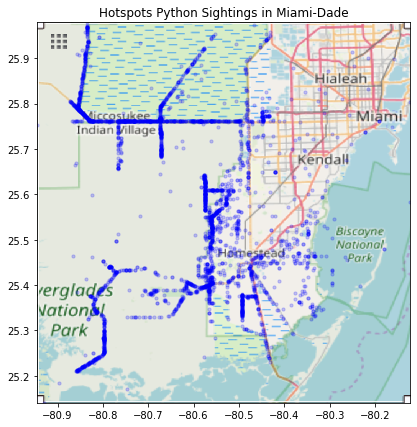

In [39]:
ruh_m = plt.imread('Miami-Dade.png')

fig5, ax5 = plt.subplots(figsize = (8,7))
ax5.scatter(df_data[df_data['County'] == 'Miami-Dade'].Longitude, df_data[df_data['County'] == 'Miami-Dade'].Latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax5.set_title('Hotspots Python Sightings in Miami-Dade')
ax5.set_xlim(BBox_miami_dade[0],BBox_miami_dade[1])
ax5.set_ylim(BBox_miami_dade[2],BBox_miami_dade[3])
ax5.imshow(ruh_m, zorder=0, extent = BBox_miami_dade, aspect= 'equal')

### Utilizing module folium for clustering visualization for cluster visualization for sightings starting in 2017

In [40]:
cent_long = (BBox_miami_dade[0]+BBox_miami_dade[1])/2
cent_lat = (BBox_miami_dade[2]+BBox_miami_dade[3])/2

In [41]:
data = df_data[(df_data['ObsDate']>pd.Timestamp(2017,1,1)) & (df_data['County'] == 'Miami-Dade')]
data.reset_index(drop = True, inplace = True)

In [42]:
import folium
from folium.plugins import FastMarkerCluster

folium_map = folium.Map(location = [cent_lat, cent_long])

# These two lines should create FastMarkerClusters
FastMarkerCluster(data=list(zip(data["Latitude"].values, data["Longitude"].values))).add_to(folium_map)

folium.LayerControl().add_to(folium_map)

for index, row in data.iterrows():

    folium.CircleMarker(location=(row["Latitude"], 
                                  row["Longitude"],),
                        radius= 1,
                        color= "#007849",
                        fill=False).add_to(folium_map)
    
folium_map

### Creating clusters through KMeans

In [43]:
X = np.array(list(zip(data["Latitude"].values, data["Longitude"].values)))
X

array([[ 25.76191, -80.74829],
       [ 25.82564, -80.35441],
       [ 25.44607, -80.57042],
       ...,
       [ 25.4197 , -80.46423],
       [ 25.31982, -80.79576],
       [ 25.48292, -80.38615]])

In [44]:
kmeans = KMeans(n_clusters=9)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [45]:
data['Cluster'] = kmeans.labels_

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Now that we have clustered the locations of sightings in Miami-Date; we will bin the data by day, and resample it by day in order to create a boolean (0,1) in order to get the probability of having sightings.

In [46]:
obs_cluster = pd.DataFrame(data.groupby(['ObsDate','Cluster'])['DateEnt'].count()).reset_index()
obs_cluster

ObsDate  Cluster  DateEnt
0   2017-01-02        1        1
1   2017-01-12        4        2
2   2017-01-16        0        1
3   2017-01-18        4        1
4   2017-01-21        3        1
..         ...      ...      ...
822 2019-10-06        1        1
823 2019-10-29        2        1
824 2019-10-29        7        1
825 2019-11-07        2        1
826 2019-11-24        0        1

[827 rows x 3 columns]

In [47]:
dict_clusters={}

for i in list(obs_cluster['Cluster'].unique()):
    dict_clusters.update({i : obs_cluster[obs_cluster['Cluster'] == i]})
#     print(i)
    
dict_clusters[2] # just checking if dataframe inside of dictionary was sucessfuly created

ObsDate  Cluster  DateEnt
35  2017-04-02        2        1
37  2017-04-03        2        1
51  2017-04-14        2        1
57  2017-04-19        2        1
58  2017-04-20        2        1
..         ...      ...      ...
806 2019-02-11        2        1
809 2019-02-21        2        1
810 2019-03-05        2        1
823 2019-10-29        2        1
825 2019-11-07        2        1

[83 rows x 3 columns]

### Resampeling each cluster in order to see if there were any reported sighting or not each day for time series analysis

In [48]:
for i in dict_clusters:
    dict_clusters[i] = dict_clusters[i].set_index('ObsDate').resample('D').sum().reset_index()
    dict_clusters[i]['DateEnt'] = dict_clusters[i]['DateEnt'].apply(lambda x: bool(x))

### Creating a dataframe with probabilities and cluster center per cluster

In [49]:
cluster_prob = pd.DataFrame(columns = ['Cluster', 'Probability'])
# cluster_prob

for i in dict_clusters:
    prob = round(dict_clusters[i]['DateEnt'].value_counts()[1]/dict_clusters[i]['DateEnt'].value_counts()[0],2)
    cluster_prob = cluster_prob.append(pd.DataFrame({
        'Cluster': [i],
        'Probability': [prob]
    }),ignore_index = True)
#     print(prob)
# dict_clusters[2]['DateEnt'].value_counts()

cluster_prob

Cluster  Probability
0       1         0.09
1       4         0.22
2       0         0.18
3       3         0.07
4       7         0.10
5       6         0.11
6       8         0.17
7       2         0.10
8       5         0.07

In [50]:
cluster_prob['Cluster_Center'] = cluster_prob['Cluster'].apply(lambda x: list(kmeans.cluster_centers_[x]))
cluster_prob.sort_values('Cluster').set_index('Cluster')

Probability                            Cluster_Center
Cluster                                                       
0               0.18   [25.78146633187773, -80.84012104803493]
1               0.09  [25.466749150943397, -80.35157132075472]
2               0.10    [25.76616450819672, -80.4459906557377]
3               0.07  [25.324474363636362, -80.80276581818181]
4               0.22   [25.57435874509804, -80.55054992156863]
5               0.07    [25.90119323076923, -80.5613076923077]
6               0.11   [25.91474682242991, -80.83748018691588]
7               0.10                 [25.40064, -80.521750625]
8               0.17   [25.77850057803468, -80.64699283236995]

### Plotting map of cluster with respective cluster number displayed for sightings starting in 2017

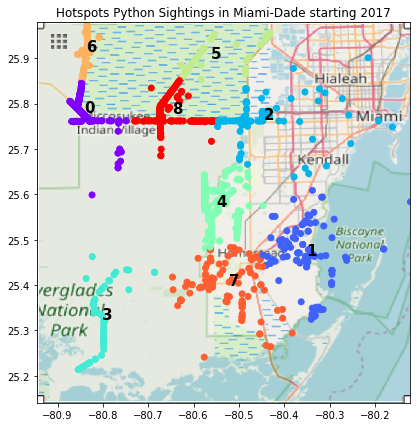

In [51]:
fig6, ax6 = plt.subplots(figsize = (8,7))
ax6.scatter(X[:,1],X[:,0], c=kmeans.labels_, cmap='rainbow')
ax6.set_title('Hotspots Python Sightings in Miami-Dade starting 2017')
ax6.set_xlim(BBox_miami_dade[0],BBox_miami_dade[1])
ax6.set_ylim(BBox_miami_dade[2],BBox_miami_dade[3])
for i in list(cluster_prob['Cluster']):
    ax6.annotate(i,
                (cluster_prob[cluster_prob['Cluster']==i]['Cluster_Center'].values[0][1], cluster_prob[cluster_prob['Cluster']==i]['Cluster_Center'].values[0][0]),
                size=15,
                weight = 'bold'
               )
ax6.imshow(ruh_m, zorder=0, extent = BBox_miami_dade, aspect= 'equal')

We can clearly see the hotspots 3, 4 and 8 have the highest probability of finding pythons on any given day.

## How many python observations do you predict will be recorded for the full 2019 year? (time-series analysis)

### Visualizing what a lineal model would look like on our data starting from 2003

In [52]:
from scipy.stats import linregress

Miami_Dade = obs_date_county[obs_date_county['County'] == 'Miami-Dade'][1:].set_index('ObsDate').resample('D').sum().reset_index()
Miami_Dade

Miami_Dade['ObsDate_ordinal']=Miami_Dade['ObsDate'].map(pd.Timestamp.toordinal)

slope, intercept, r_squared, p_value, std_err = linregress(
    Miami_Dade[Miami_Dade['ObsDate']>pd.Timestamp(2003,1,1)]['ObsDate_ordinal'],
    Miami_Dade[Miami_Dade['ObsDate']>pd.Timestamp(2003,1,1)]['Count']
)

slope, intercept, r_squared, p_value, std_err

(0.0001386580451830973,
 -101.25068316741418,
 0.19275407019636667,
 1.0019987637439956e-52,
 8.986953948490285e-06)

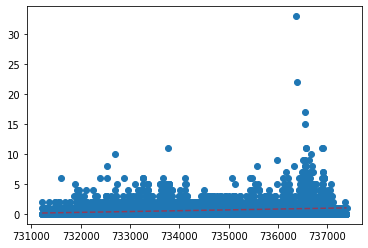

In [53]:
plt.scatter(Miami_Dade[Miami_Dade['ObsDate']>pd.Timestamp(2003,1,1)]['ObsDate_ordinal'], 
            Miami_Dade[Miami_Dade['ObsDate']>pd.Timestamp(2003,1,1)]['Count'])

plt.plot(
    Miami_Dade[Miami_Dade['ObsDate']>pd.Timestamp(2003,1,1)]['ObsDate_ordinal'],
    (slope * Miami_Dade[Miami_Dade['ObsDate']>pd.Timestamp(2003,1,1)]['ObsDate_ordinal']) + intercept, # y = mx + b
    color = 'red',
    alpha = .5,
    linestyle = '--'
)

We can clearly see a lot of outliers that might be skewing the data, but conseptually we can see that a linear model could fit the data.

### Visualizing Data resampled daily rather than monthly

In [54]:
miami_dade_2003 = obs_date_county[obs_date_county['County'] == 'Miami-Dade']
miami_dade_2003.set_index(keys = 'ObsDate', inplace = True)
miami_dade_2003 = miami_dade_2003.resample('D').sum().reset_index()
miami_dade_2003.head()

ObsDate  Count
0 1979-10-24      1
1 1979-10-25      0
2 1979-10-26      0
3 1979-10-27      0
4 1979-10-28      0

In [55]:
mean = np.mean(miami_dade_2003['Count'], axis=0)
sd = np.std(miami_dade_2003['Count'], axis=0)
mean, sd

(0.2414970632427264, 0.8804384479907127)

### this is a very low mean and standard, which would lead us to removing too many data points as we will show below.

In [56]:
df_test = pd.DataFrame({'Count':[x for x in miami_dade_2003['Count'] if (x < mean + 3 * sd)]})
df_test['Count'].value_counts()

0    12743
1     1137
2      400
Name: Count, dtype: int64

In [57]:
miami_dade_2003['Count'].value_counts()

0     12743
1      1137
2       400
3       170
4        77
5        45
6        36
7        11
8         7
11        5
9         5
10        2
15        1
22        1
33        1
17        1
Name: Count, dtype: int64

### As you can see on the above two cells, this will remove all values above 2, which leads to losing too many important data points. This leads to our linear regressing being innacurate.

### We will now see if although we keep the 

In [58]:
miami_dade_2003['ObsDate_ordinal']=miami_dade_2003['ObsDate'].map(pd.Timestamp.toordinal)

slope_2003, intercept_2003, r_squared_2003, p_value_2003, std_err_2003 = linregress(
    miami_dade_2003[miami_dade_2003['ObsDate']>pd.Timestamp(2003,1,1)]['ObsDate_ordinal'],
    miami_dade_2003[miami_dade_2003['ObsDate']>pd.Timestamp(2003,1,1)]['Count']
)

slope_2003, intercept_2003, r_squared_2003, p_value_2003, std_err_2003

(0.0001386580451830973,
 -101.25068316741418,
 0.19275407019636667,
 1.0019987637439956e-52,
 8.986953948490285e-06)

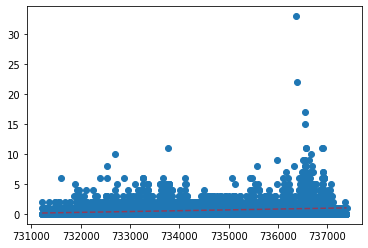

In [59]:
plt.scatter(miami_dade_2003[miami_dade_2003['ObsDate']>pd.Timestamp(2003,1,1)]['ObsDate_ordinal'], 
            miami_dade_2003[miami_dade_2003['ObsDate']>pd.Timestamp(2003,1,1)]['Count'])

plt.plot(
    miami_dade_2003[miami_dade_2003['ObsDate']>pd.Timestamp(2003,1,1)]['ObsDate_ordinal'],
    (slope_2003 * miami_dade_2003[miami_dade_2003['ObsDate']>pd.Timestamp(2003,1,1)]['ObsDate_ordinal']) + intercept_2003, # y = mx + b
    color = 'red',
    alpha = .5,
    linestyle = '--'
)

When trying to remove outliers with the data as daily resampel, resulted in a low slope.

### Using linear regression for prediction

In [60]:
features = miami_dade_2003[['ObsDate_ordinal']]
target = miami_dade_2003[['Count']]

i = round(miami_dade_2003.shape[0] * .8) #Use 80% of data for training
i

11714

In [61]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(
    features[:i],
    target[:i]
)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
predictions = model.predict(features[i:])
predictions

array([[0.3700767 ],
       [0.37012076],
       [0.37016482],
       ...,
       [0.49894846],
       [0.49899252],
       [0.49903658]])

In [63]:
model.score(
    features[i:],
    target[i:]
)

-0.03661949478147064

In [64]:
y_predict = model.predict(features[i:])
y_predict.mean()

0.4345566402506599

We have an average of the predictions as pretty much zero due to the sampling being done daily, and us having so many missing data since we do not hae officials everyday out in the field.

### Since resampling daily lowers the slope of the line of best fit for our sample, then we decided to go ahead and use our data resampled monthly in order to get a more understandable number of sightings for the rest of the year.

In [65]:
miami_dade_2003 = obs_date_county[obs_date_county['County'] == 'Miami-Dade']
miami_dade_2003.set_index(keys = 'ObsDate', inplace = True)
miami_dade_2003 = miami_dade_2003.resample('M').sum().reset_index()
miami_dade_2003.head()

ObsDate  Count
0 1979-10-31      1
1 1979-11-30      0
2 1979-12-31      0
3 1980-01-31      0
4 1980-02-29      0

In [66]:
miami_dade_2003['ObsDate_ordinal']=miami_dade_2003['ObsDate'].map(pd.Timestamp.toordinal)

In [67]:
features = miami_dade_2003[['ObsDate_ordinal']]
target = miami_dade_2003[['Count']]

i = round(miami_dade_2003.shape[0] * .8) #Use 80% of data for training
i

386

In [68]:
model2 = LinearRegression()

model2.fit(
    features[:i],
    target[:i]
)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
predictions = model2.predict(features[i:])
predictions.mean()

13.23473148992334

As one can see our monthly prediction is of about 13 sightings which is above the mean that we will see below.

In [70]:
mean = np.mean(miami_dade_2003['Count'], axis=0)
sd = np.std(miami_dade_2003['Count'], axis=0)
mean, sd

(7.33609958506224, 15.281694624481014)

In [71]:
model.score(
    features[i:],
    target[i:]
)

-0.8440103219117101

The score of the model is still very poor, and we believe another type of model should be used to predict the sightings for the rest of the year but, we will go ahead and use our model anyways.

In [72]:
miami_dade_2003[-2:]

ObsDate  Count  ObsDate_ordinal
480 2019-10-31      4           737363
481 2019-11-30      2           737393

We need to add 31 days to the ObsDate_ordianl, and make that our new feature to predict the number of sightings for December 2019.

In [73]:
dec_2019 = pd.DataFrame({
    'ObsDate' : [pd.Timestamp(2019,12,31)],
    'Count' : [np.nan],
    'ObsDate_ordinal' : [pd.Timestamp(2019,12,31).toordinal()]
})
dec_2019

ObsDate  Count  ObsDate_ordinal
0 2019-12-31    NaN           737424

In [74]:
dec_2019.fillna(value = model2.predict(dec_2019[['ObsDate_ordinal']]).ravel()[0])

ObsDate      Count  ObsDate_ordinal
0 2019-12-31  15.211433           737424

As we can see above, the predicted value for December of 2019 is of about 15 sightings for the month.

## Second Step continued 

### Importing some more needed modules

In [75]:
import networkx as nx
import cufflinks as cf
from ipywidgets import interact
import re
import calendar
from matplotlib_venn import venn2, venn2_circles

cf.go_offline()

In [76]:
data = clean_data

## When are people most likely to spot pythons, and why? (Analysis + viz)

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4795 entries, 0 to 4797
Data columns (total 10 columns):
Reporter      4795 non-null object
ObsDate       4795 non-null datetime64[ns]
DateEnt       4795 non-null datetime64[ns]
Location      4795 non-null object
Longitude     4795 non-null float64
Latitude      4795 non-null float64
RecOwner      4795 non-null object
First_Name    4795 non-null object
Last_Name     4795 non-null object
County        4795 non-null object
dtypes: datetime64[ns](2), float64(2), object(6)
memory usage: 412.1+ KB


### Creating a dataframe with only the date of the observation, first name, last name, month, and year.

In [78]:
data['Date_Formatted'] =  pd.to_datetime(data['ObsDate'])

In [79]:
time_data = data[['Date_Formatted', 'First_Name', 'Last_Name']]

In [80]:
time_data['Month'] = time_data['Date_Formatted'].apply(lambda x: re.sub('-.*','',re.sub('\d{4}-','',str(x))))
time_data['Year_Month'] = time_data['Date_Formatted'].apply(lambda x: re.sub('-\d{2}$','',str(x)))
time_data['Year'] = time_data['Date_Formatted'].apply(lambda x: re.sub('-.*','',str(x)))

In [81]:
time_data

Date_Formatted  First_Name    Last_Name Month           Year_Month  Year
0        2019-11-24      Travis     Mangione    11  2019-11-24 00:00:00  2019
1        2019-11-20      Edward      Metzger    11  2019-11-20 00:00:00  2019
2        2019-11-07     Michael      Reupert    11  2019-11-07 00:00:00  2019
3        2019-11-06     Matthew  Mccollister    11  2019-11-06 00:00:00  2019
4        2019-11-05     Matthew  Mccollister    11  2019-11-05 00:00:00  2019
...             ...         ...          ...   ...                  ...   ...
4793     2008-12-27     Jeffrey       Carter    12  2008-12-27 00:00:00  2008
4794     2008-10-15     Michael        Renda    10  2008-10-15 00:00:00  2008
4795     2008-12-01  Government       Agency    12  2008-12-01 00:00:00  2008
4796     2008-06-24  Government       Agency    06  2008-06-24 00:00:00  2008
4797     2008-05-20  Government       Agency    05  2008-05-20 00:00:00  2008

[4795 rows x 6 columns]

### Sightings by month

In [82]:
time_data.groupby('Month')['First_Name'].count().sort_values(ascending = False)

Month
08    675
07    545
01    535
12    483
11    444
10    403
06    350
05    342
09    334
02    239
04    233
03    212
Name: First_Name, dtype: int64

In [84]:
calendar.month_abbr[8]

'Aug'

We can see that the most amount of sightings have been in the month of August.

In [85]:
time_data['Month'] = time_data['Month'].astype(int)

In [86]:
time_data['Month_Name'] = time_data['Month'].apply(lambda x: calendar.month_abbr[x])

In [87]:
time_data['Month_Name'].value_counts().iplot(kind = 'bar', title = 'Python Sitings Aggregated by Month')

Above we can see a bar graph showing tha tmost of the sightings have been in August.

### Creating a dictionary to know the different season in Florida, which there is only two: wet season or dry season.

In [88]:
SF_Seasons = {'Apr':'Wet_Season',
              'May':'Wet_Season',
              'Jun':'Wet_Season',
              'Jul':'Wet_Season',
              'Aug':'Wet_Season',
              'Sep':'Wet_Season',
              'Oct':'Dry_Season',
              'Nov':'Dry_Season',
              'Dec':'Dry_Season',
              'Jan':'Dry_Season',
              'Feb':'Dry_Season',
              'Mar':'Dry_Season'
             }

#Source: https://www.weather.gov/mfl/summer_season

In [89]:
time_data['SF_Season'] = time_data['Month_Name'].apply(lambda x: SF_Seasons[x])

In [90]:
time_data['SF_Season'].value_counts().iplot(kind = 'bar', title = 'Python Sightings by Season')

Dividing the sightings between wet season and dry season also shows us that there is more sightings during the wet season, but not that big of a difference with dry season.

### Creating a dictionary with average temperatures for each month in Miami.

In [91]:
AVG_Monthly_Temp_F = {'Apr': 74,
                      'May': 78,
                      'Jun': 82,
                      'Jul': 84,
                      'Aug': 85,
                      'Sep': 84,
                      'Oct': 84,
                      'Nov': 77,
                      'Dec': 73,
                      'Jan': 68,
                      'Feb': 69,
                      'Mar': 71
                         }
#Source: https://www.weather.gov/media/mfl/climate/Miami%20Daily%20Normals%20(1981-2010).pdf

In [92]:
time_data['SF_AVG_Monthly_Temp_F'] = time_data['Month_Name'].apply(lambda x: AVG_Monthly_Temp_F[x])

In [93]:
time_data['SF_AVG_Monthly_Temp_F'].value_counts().iplot(kind = 'bar', title = 'Python Sightings by Temp')

the bar graph above shows us that there seem to be more sightings when is warmer.

In [94]:
time_data['Temp'] = np.where(
                    time_data['SF_AVG_Monthly_Temp_F'] >= 76,
                    'Warm',
                    'Cold'
)

In [95]:
time_data['Temp'].value_counts().iplot(kind = 'bar', title = 'Python Sightings by Climate')

By grouping each sighting by the average temperature of that month, and assigning each month as warm if it is above 76 degrees fahrenheit, we can see that there is drastically more sightings when it is warm.

In [96]:
sorted(AVG_Monthly_Temp_F, key=AVG_Monthly_Temp_F.get, reverse = False)[:5]

['Jan', 'Feb', 'Mar', 'Dec', 'Apr']

The months of January, February, March, December, and April seem to be the months with the most sightings according to this deduction.

<strong>Source: </strong>http://crocdoc.ifas.ufl.edu/publications/factsheets/Burmese%20pythons%20in%20S%20FL_IFAS%20factsheet_final_NPS.pdf

- According to the source above, pythons will hatch between July and August (the 2 hightest months for sightings). This may be indicative that pythons are more often spotted after their eggs hatch and and both mature pythons and hatchlings are spotted. This can be verified with further data on the maturity of the python spotted
- The next preceeding 2 months are 2 of the cooler months in the year, so pythons may be coming out to warm themselves up

## Are sightings cyclical? (Analysis + viz)

In [98]:
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

time_data['Month_Name'].value_counts().loc[month_order].iplot(kind = 'bar', title = 'Python Sitings Aggregated by Month')


there seems to be a seasonality by looking at the number of sightings by month.

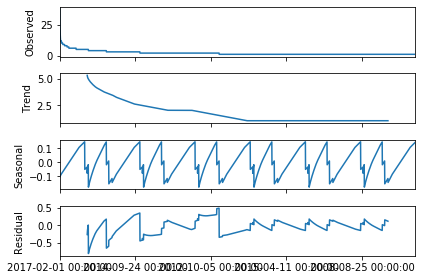

In [100]:
from statsmodels.tsa.seasonal import seasonal_decompose

_ = seasonal_decompose(time_data['Year_Month'].value_counts(), freq = 365).plot()

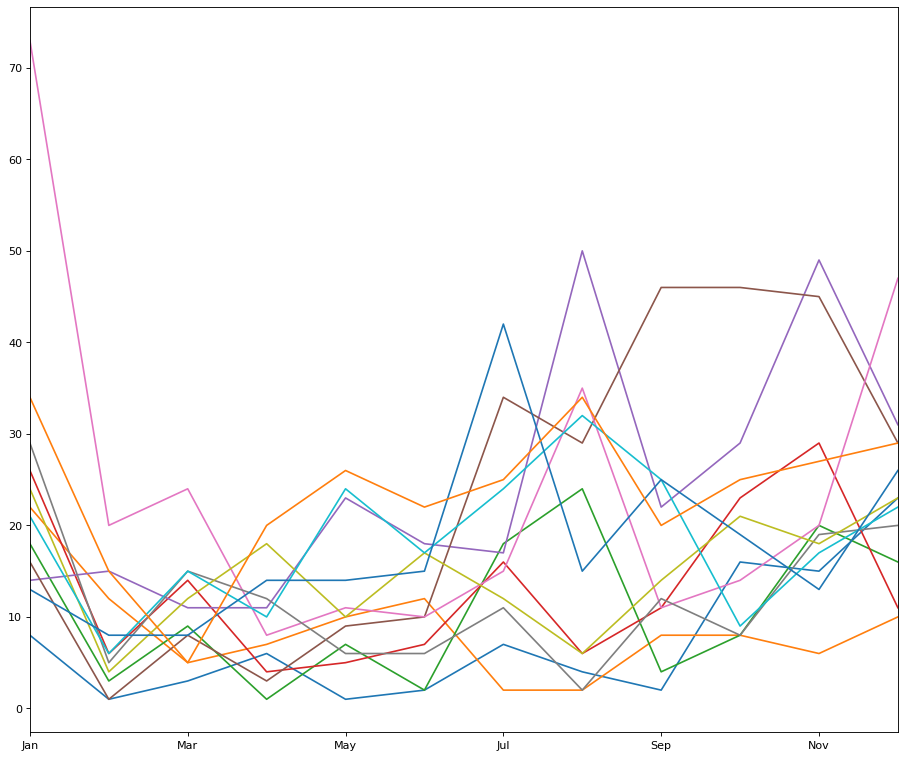

In [102]:
data_format_1 = time_data[(time_data["Year"].str.contains("2003"))
|(time_data["Year"].str.contains("2004"))
|(time_data["Year"].str.contains("2005"))
|(time_data["Year"].str.contains("2006"))
|(time_data["Year"].str.contains("2007"))
|(time_data["Year"].str.contains("2008"))
|(time_data["Year"].str.contains("2009"))
|(time_data["Year"].str.contains("2010"))
|(time_data["Year"].str.contains("2011"))
|(time_data["Year"].str.contains("2012"))
|(time_data["Year"].str.contains("2013"))
|(time_data["Year"].str.contains("2014"))
|(time_data["Year"].str.contains("2015"))
|(time_data["Year"].str.contains("2016"))
|(time_data["Year"].str.contains("2017"))
|(time_data["Year"].str.contains("2018"))
|(time_data["Year"].str.contains("2019"))]


data_format_2 = data_format_1.pivot_table(index = 'Year', columns = 'Month', aggfunc = 'count')

data_format_3 = data_format_2[[('Temp',  1),
                                ('Temp',  2),
                                ('Temp',  3),
                                ('Temp',  4),
                                ('Temp',  5),
                                ('Temp',  6),
                                ('Temp',  7),
                                ('Temp',  8),
                                ('Temp',  9),
                                ('Temp', 10),
                                ('Temp', 11),
                                ('Temp', 12),]].reset_index()

year = [data_format_3.iloc[value].values[0] for value in range(1, len(data_format_3.columns))]
Jan = [data_format_3.iloc[value].values[1] for value in range(1, len(data_format_3.columns))]
Feb = [data_format_3.iloc[value].values[2] for value in range(1, len(data_format_3.columns))]
Mar = [data_format_3.iloc[value].values[3] for value in range(1, len(data_format_3.columns))]
Apr = [data_format_3.iloc[value].values[4] for value in range(1, len(data_format_3.columns))]
May = [data_format_3.iloc[value].values[5] for value in range(1, len(data_format_3.columns))]
Jun = [data_format_3.iloc[value].values[6] for value in range(1, len(data_format_3.columns))]
Jul = [data_format_3.iloc[value].values[7] for value in range(1, len(data_format_3.columns))]
Aug = [data_format_3.iloc[value].values[8] for value in range(1, len(data_format_3.columns))]
Sep = [data_format_3.iloc[value].values[9] for value in range(1, len(data_format_3.columns))]
Oct = [data_format_3.iloc[value].values[10] for value in range(1, len(data_format_3.columns))]
Nov = [data_format_3.iloc[value].values[11] for value in range(1, len(data_format_3.columns))]
Dec = [data_format_3.iloc[value].values[12] for value in range(1, len(data_format_3.columns))]


data_format_4 = pd.DataFrame({
    'Year': year,
    'Jan' : Jan,
    'Feb' : Feb,
    'Mar' : Mar,
    'Apr' : Apr,
    'May' : May,
    'Jun' : Jun,
    'Jul' : Jul,
    'Aug' : Aug,
    'Sep' : Sep,
    'Oct' : Oct,
    'Nov' : Nov,
    'Dec' : Dec
}).set_index('Year')

plt.figure(figsize=(14,12), dpi= 80)
data_format_4.iloc[0].plot(kind = 'line')
data_format_4.iloc[1].plot(kind = 'line')
data_format_4.iloc[2].plot(kind = 'line')
data_format_4.iloc[3].plot(kind = 'line')
data_format_4.iloc[4].plot(kind = 'line')
data_format_4.iloc[5].plot(kind = 'line')
data_format_4.iloc[6].plot(kind = 'line')
data_format_4.iloc[7].plot(kind = 'line')
data_format_4.iloc[8].plot(kind = 'line')
data_format_4.iloc[9].plot(kind = 'line')
data_format_4.iloc[10].plot(kind = 'line')
data_format_4.iloc[11].plot(kind = 'line')

# Third step: iNaturalist

# INaturalist component.

- Should we be using iNaturalist to get the public more engaged? 
  + to few entries at current for use in identifying Burmese Python patterns.[82 total in FL]
  + could be usable, though almost half the users are anonimous. [28 of the 55 totalusers have a name attached to account]
- Which iNaturalist users are most active in sighting pythons? (edited) 
  + mostly nul on actual names. top3
      - pythonbob	   - noname give  : 12
      - joemdo	        - Joe MDO     : 6
      - michiko         - Michiko     : 4
- Which iNaturalist users are most active in identifying pythons? Hint: iNaturalist observations must be confirmed by other users... (edited) 
      - daniel_e    - Daniel Estabrooks :65
      - tysmith	    - no name given :42
      - gibbous	    - no name given :38     
- Which iNaturalist users are most connected in the python-spotting community (i.e. who are the influencers)? (edited) 
      - gibbous	   - no name give       
      - dodomae98  - no name given
      - pythonbob  - no name given
- Are any wildlife officials also using iNaturalist? (Hint: yes)
     - 3 peole. 

## Required Modules

In [103]:
import requests 
from pandas.io.json import json_normalize
from math import ceil
import json

In [104]:
def top5_dict(in_put, top = 5):
    in_sort = sorted(in_put.items(), key=lambda kv: kv[1],reverse = True)
    top_ones =[el for i,el in enumerate(in_sort) if i<top]
    return top_ones

### Pulling data from inaturalist

In [105]:
dataurl = "https://api.inaturalist.org/v1/observations?verifiable=true&order_by=observations.id&order=desc&spam=false&place_id=21&taxon_id=238252&locale=en-US&per_page=100"
responce = requests.get(dataurl)
responce

<Response [200]>

In [106]:
data = responce.json()
flatdata = json_normalize(data)
# flatdata
total=100
per_page = flatdata['per_page']
pages = ceil(total/ per_page)
# pages
page_data = []
for page in range(1,pages+1):
    responce = requests.get(dataurl + '&page='+ str(page))
    result = json_normalize(responce.json()['results'])
    page_data.append(pd.DataFrame(result))
        
df = pd.concat (page_data)
identifications= df['identifications']
# other fix to nest: cosider the use of postman to 
df.drop(columns= ['identifications','non_owner_ids'],inplace = True)
col=[str(i).replace('.','_') for i in list(df.columns)]
df.columns=col # replaces '.' with '_' to facilitate queries.

In [107]:
df.head()

out_of_range quality_grade           time_observed_at taxon_geoprivacy  \
0         True      research  2015-02-23T08:17:00-05:00             None   
1         True      research  2019-11-27T21:00:58-05:00             None   
2         True      research  2019-11-27T19:49:24-05:00             None   
3         True      research  2019-11-10T22:04:09-05:00             None   
4         True      research  2019-11-05T18:21:16-05:00             None   

  annotations context_user_geoprivacy                                  uuid  \
0          []                    None  d25c6eb2-e5c1-485d-80ae-d9d8eb2f6a52   
1          []                    None  c20ce707-7ce3-4be0-9916-19ccf70cb286   
2          []                    None  128ce356-3aeb-40ef-8caa-b394e163b965   
3          []                    None  0131e350-538e-4ee2-be4a-dc0f8836677d   
4          []                    None  0b4a2d5b-af68-4604-a957-e9bf6a08f0e9   

         id  cached_votes_total  identifications_most_agree   species_guess  \
0  36693495                   0                        True  Burmese Python   
1  36162544                   0                        True  Burmese Python   
2  36162417                   0                        True  Burmese Python   
3  35585367                   1                        True  Burmese Python   
4  35350568                   0                        True  Burmese Python   

   identifications_most_disagree tags  positional_accuracy  comments_count  \
0                          False   []                488.0               0   
1                          False   []                 58.0               0   
2                          False   []                 20.0               0   
3                          False   []                270.0               3   
4                          False   []                 32.0               4   

   site_id created_time_zone  id_please license_code observed_time_zone  \
0        1  America/New_York      False     cc-by-nc   America/New_York   
1        1  America/New_York      False     cc-by-nc   America/New_York   
2        1  America/New_York      False     cc-by-nc   America/New_York   
3        1  America/New_York      False     cc-by-nc   America/New_York   
4        1  America/New_York      False     cc-by-nc   America/New_York   

  quality_metrics  public_positional_accuracy  \
0              []                       488.0   
1              []                        58.0   
2              []                        20.0   
3              []                       270.0   
4              []                        32.0   

                                 reviewed_by context_geoprivacy  \
0         [268311, 971085, 1104294, 1871474]               None   
1                  [769610, 971085, 2320836]               None   
2         [268311, 971085, 2008097, 2320836]               None   
3                  [268311, 971085, 2320836]               None   
4  [281081, 324885, 769610, 971085, 1737389]               None   

   oauth_application_id flags                 created_at  \
0                   NaN    []  2019-12-15T22:52:22-05:00   
1                   3.0    []  2019-11-28T11:42:31-05:00   
2                   3.0    []  2019-11-28T11:37:28-05:00   
3                   3.0    []  2019-11-11T16:55:45-05:00   
4                   3.0    []  2019-11-05T20:33:57-05:00   

                                         description time_zone_offset  \
0                                                              -05:00   
1                                           7ft long           -05:00   
2  Got ran over. Around 6ft long. You can see it ...           -05:00   
3                                     A lil over 6ft           -05:00   
4  Third python in three nights. Biggest one yet ...           -05:00   

  project_ids_with_curator_id observed_on  \
0                          []  2015-02-23   
1                     [10739]  2019-11-27   
2                          []  2019-11-27 

### relationship. 
- code below grabs the identifications made by poeple for each entrie, and calculates who is connected to the most people by the least number of steps. in other words, who can be considered the most influential in the python comunity of INaturalist. 

In [111]:
relation = []
for i in range(82):
    idet  = pd.DataFrame(identifications.values.flatten()[i])
    for user in idet['user']:
        rel = re.sub("', 'spam'.*",'',str(user))
        rel = re.sub(".*'login': '",'',rel)
        relation.append([i,rel]) # cleaning data for use
rel = []
for i in range(82):
    rel.append(relation[i])# = df['user.login_exact'].loc[i] # list of names by id they identified for
jofson = pd.DataFrame(rel, columns = ['Name_x', 'Name_y'])

In [112]:
G = nx.convert_matrix.from_pandas_edgelist(jofson, source = 'Name_x', target = 'Name_y')

top5_dict( dict(nx.degree_centrality(G)))

[('gibbous', 0.34),
 ('dodomae98', 0.24),
 ('lucareptile', 0.12),
 (6, 0.12),
 (10, 0.12)]

In [113]:
top5_dict(dict(nx.eigenvector_centrality_numpy(G)))

[('gibbous', 0.4911956718616245),
 ('dodomae98', 0.386201934517111),
 (15, 0.21705903477235858),
 (11, 0.20687348843489353),
 (10, 0.20607946669100538)]

In [114]:
top5_dict(dict(nx.betweenness_centrality(G,weight = 'edge')))

[('gibbous', 0.5734027626705878),
 ('dodomae98', 0.18470888727204882),
 (6, 0.15623356009070297),
 (13, 0.11833308561519845),
 (5, 0.11521152474562465)]